In [1]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
from descartes import PolygonPatch

In [2]:
censustract = gpd.read_file("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial dot map/Tract_2010Census_DP1/Tract_2010Census_DP1.shp")

In [3]:
# North Carolina
censustractNC = gpd.read_file("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial dot map/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k.shp")

In [4]:
race = [
'DP0080003',
'DP0080004',
'DP0080005',
'DP0080006',
'DP0080014',
'DP0080019',
'DP0080021',
'DP0080022',
'DP0080023',
'DP0080024']

In [5]:
name = [
  'White',
  'Black or African American',
  'American Indian and Alaska Native',
  'Asian',
  'Native Hawaiian and Other Pacific Islander',
  'Some Other Race',
  'White; American Indian and Alaska Native',
  'White; Asian',
  'White; Black or African American',
  'White; Some Other Race'
]

In [6]:
censustractNC['GEO_ID'] = [x.replace('1400000US', '') for x in censustractNC['GEO_ID']]

In [7]:
# North Carolina
NCcensus = censustract.merge(censustractNC, left_on='GEOID10', right_on='GEO_ID')

In [8]:
NCcensus = NCcensus.drop('geometry_y',1)

In [9]:
NCcensus.rename(columns={'geometry_x':'geometry'}, inplace=True)

In [10]:
NCcensus.rename(columns=dict(zip(race, name)), inplace=True)

In [11]:
# include needed variables
NCdata = NCcensus[name+['geometry','TRACT','CENSUSAREA']]
#NCcensus = GeoDataFrame(NCcensus[race], geometry=NCcensus['geometry'])

In [13]:
del NCdata['White; American Indian and Alaska Native']
del NCdata['White; Asian']
del NCdata['White; Black or African American']
del NCdata['White; Some Other Race']

In [16]:
# North Carolina Data
NCdata

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,geometry,TRACT,CENSUSAREA
0,1894,1500,61,26,0,120,"POLYGON ((-79.56728699999991 34.994798, -79.56...",970100,95.090
1,2970,1315,78,30,0,436,POLYGON ((-79.71752599999991 35.17359599999997...,970200,176.733
2,3443,1462,133,47,5,135,POLYGON ((-79.76772999999997 34.85600800000009...,970800,53.807
3,4095,761,151,45,3,100,POLYGON ((-79.76772999999997 34.85600800000009...,970900,9.000
4,1732,2199,55,36,7,41,POLYGON ((-79.69038399999999 34.89384500000011...,971000,19.009
5,2255,1658,274,11,1,30,"POLYGON ((-79.5684 34.99508800000007, -79.5676...",971100,62.215
6,3534,968,106,34,5,175,POLYGON ((-79.83058499999999 34.91775200000001...,970300,39.294
7,2803,1136,73,79,0,59,"POLYGON ((-79.72185499999995 34.985094, -79.72...",970400,7.453
8,1811,1774,91,73,0,333,POLYGON ((-79.70793900000001 34.90975700000001...,970600,6.458
9,2258,453,112,10,4,211,POLYGON ((-79.76733000000002 34.91213800000003...,970700,3.136


In [28]:
blk = NCdata['Black or African American']
color = [str(item/255.) for item in blk]

## Plot

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from matplotlib.patches import Polygon
import numpy as np

In [78]:
#plt.rcParams['figure.figsize'] = (50, 50)

#m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
#    projection="merc"
#)
# ur: 36.626368, 33.790373
# ll: 33.790373, -84.581256

#m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial_dot_map/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k", "gz_2010_37_140_00_500k") # m.zipcodes

### Census Tract Level: Race Density Map (w/ Congressional District of 2009)

##### 1. Black or African American

(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1b74c92d0>)

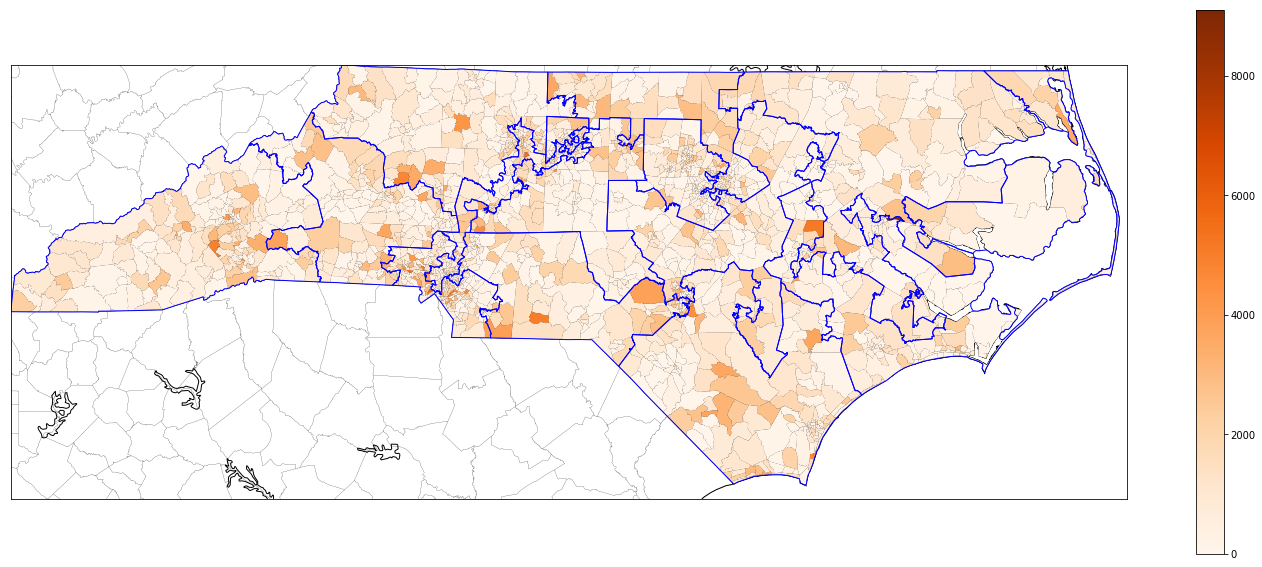

In [105]:
import matplotlib.cm
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial_dot_map/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k", "gz_2010_37_140_00_500k") 

m.drawcoastlines()
m.drawcounties()

map_shapes = pd.DataFrame({
        'shapes': [Polygon(np.array(geometry), True) for geometry in m.gz_2010_37_140_00_500k]
    })


cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(map_shapes.shapes, zorder=2)


norm = Normalize()
 
pc.set_facecolor(cmap(norm(NCdata['Black or African American'].fillna(0).values)))

ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(NCdata['Black or African American'])
plt.colorbar(mapper, shrink=0.4)

# Add another layer of shapefiles of Congressional District
m.readshapefile('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110', 'cd37_110', drawbounds=True, linewidth=1, color='b')

##### 2. American Indian and Alaska Native

(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x125a550d0>)

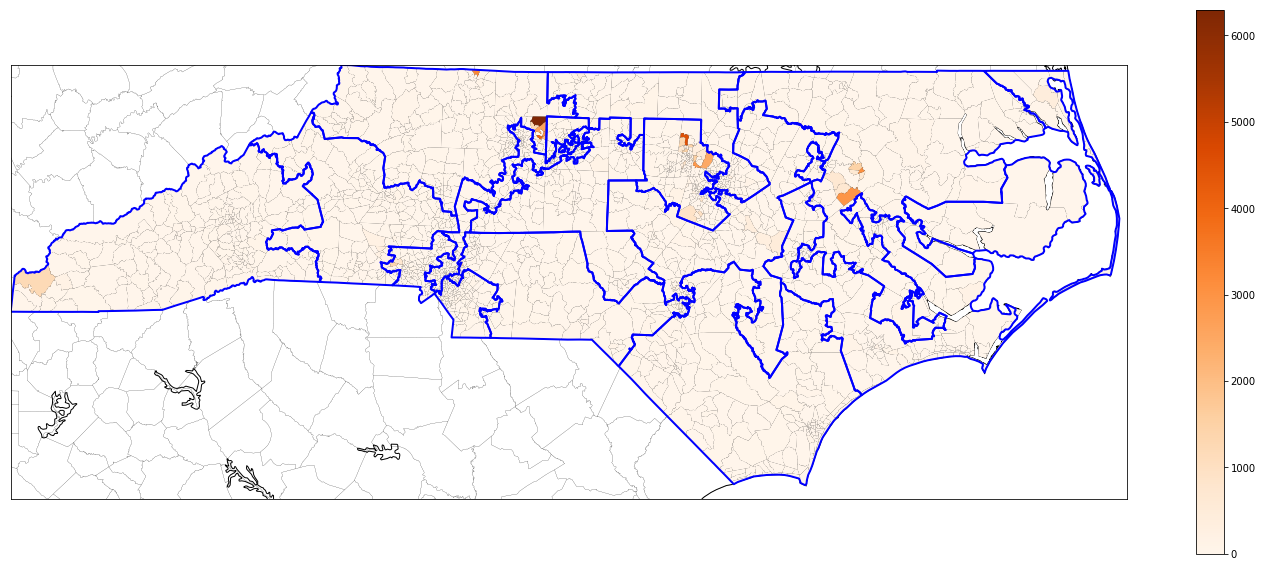

In [103]:
fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial_dot_map/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k", "gz_2010_37_140_00_500k") 

m.drawcoastlines()
m.drawcounties()

cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(map_shapes.shapes, zorder=2)

norm = Normalize()
 
pc.set_facecolor(cmap(norm(NCdata['American Indian and Alaska Native'].fillna(0).values)))

ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(NCdata['American Indian and Alaska Native'])
plt.colorbar(mapper, shrink=0.4)

# Add another layer of shapefiles of Congressional District
m.readshapefile('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110', 'cd37_110', drawbounds=True, linewidth=2, color='b')

##### 3. White

(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x13967efd0>)

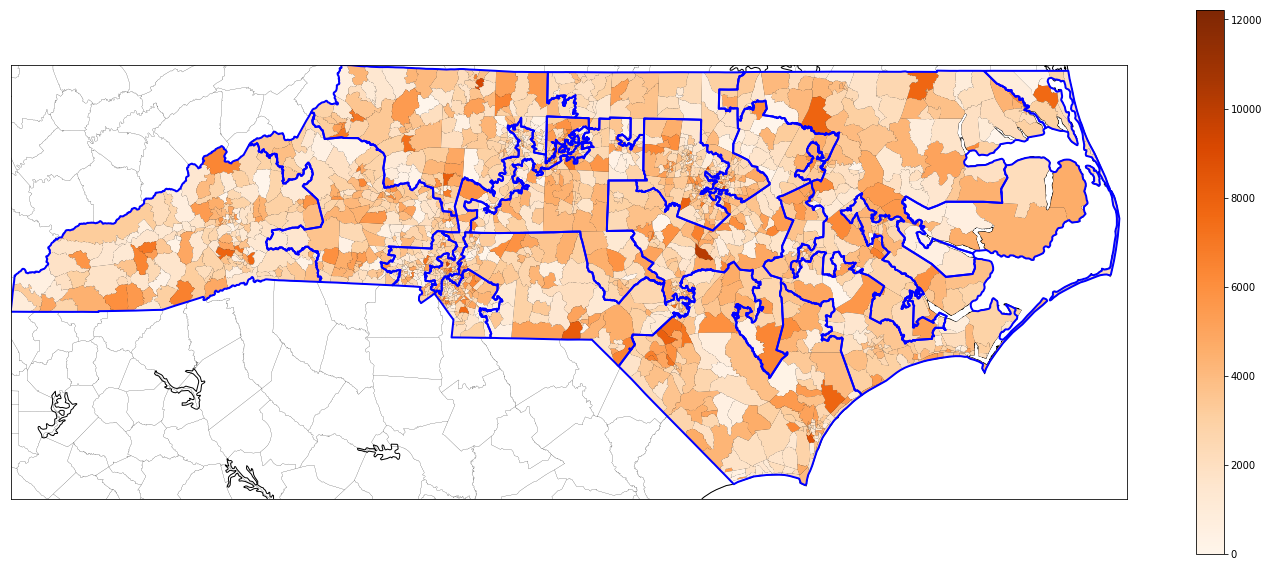

In [102]:
fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial_dot_map/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k", "gz_2010_37_140_00_500k") 

m.drawcoastlines()
m.drawcounties()

cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(map_shapes.shapes, zorder=2)

norm = Normalize()
 
pc.set_facecolor(cmap(norm(NCdata['White'].fillna(0).values)))

ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(NCdata['White'])
plt.colorbar(mapper, shrink=0.4)

# Add another layer of shapefiles of Congressional District
m.readshapefile('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110', 'cd37_110', drawbounds=True, linewidth=2, color='b')

##### 4. Asian

(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x11bddf090>)

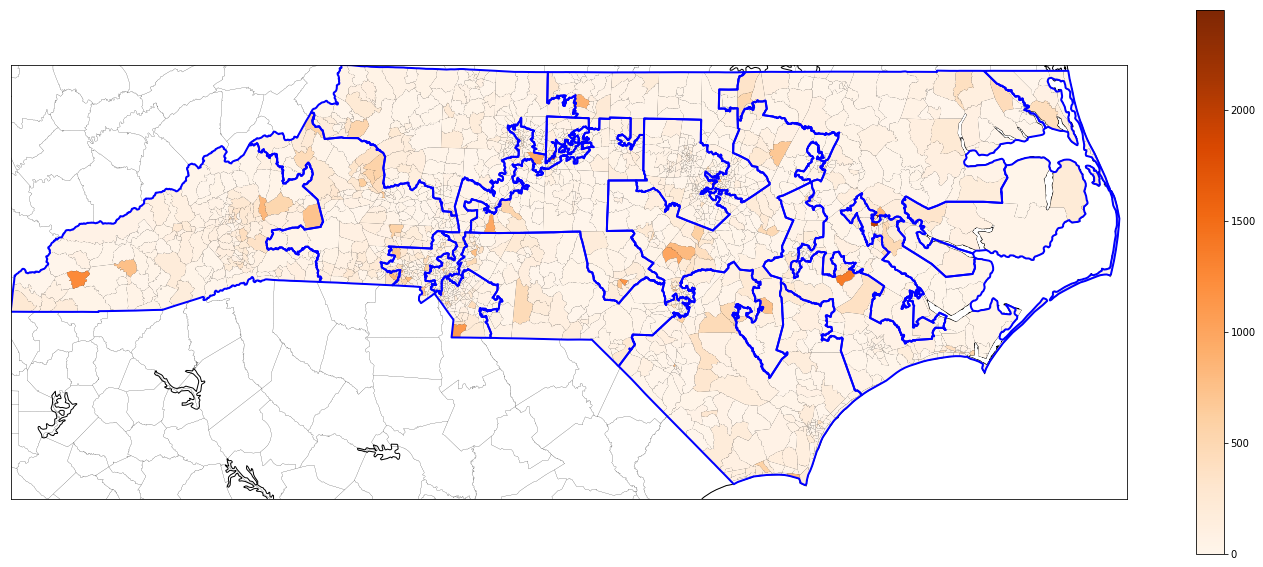

In [101]:
fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial_dot_map/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k", "gz_2010_37_140_00_500k") 

m.drawcoastlines()
m.drawcounties()

cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(map_shapes.shapes, zorder=2)

norm = Normalize()
 
pc.set_facecolor(cmap(norm(NCdata['Asian'].fillna(0).values)))

ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(NCdata['Asian'])
plt.colorbar(mapper, shrink=0.4)

# Add another layer of shapefiles of Congressional District
m.readshapefile('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110', 'cd37_110', drawbounds=True, linewidth=2, color='b')

##### 5. Some Other Race

(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1432264d0>)

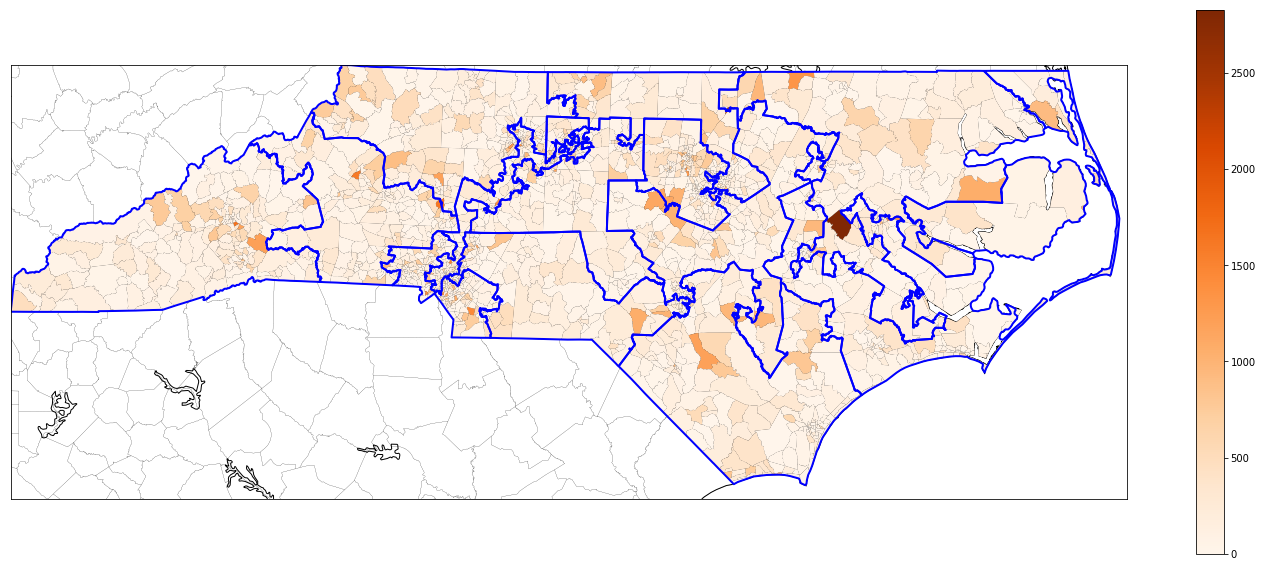

In [100]:
fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/racial_dot_map/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k", "gz_2010_37_140_00_500k") 

m.drawcoastlines()
m.drawcounties()
    
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(map_shapes.shapes, zorder=2)

norm = Normalize()
 
pc.set_facecolor(cmap(norm(NCdata['Some Other Race'].fillna(0).values)))

ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(NCdata['Some Other Race'])
plt.colorbar(mapper, shrink=0.4)

# Add another layer of shapefiles of Congressional District
m.readshapefile('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110', 'cd37_110', drawbounds=True, linewidth=2, color='b')